In [63]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import pickle

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc, plot_confusion_matrix

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head(20)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
5,CONFIRMED,0,0,0,0,2.566589,1.780000e-05,-1.780000e-05,179.554370,0.004610,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,0,0,0,0,16.068647,1.090000e-05,-1.090000e-05,173.621937,0.000517,...,-83,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
7,CONFIRMED,0,0,0,0,2.470613,2.700000e-08,-2.700000e-08,122.763305,0.000009,...,-78,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
8,CONFIRMED,0,1,0,0,2.204735,4.300000e-08,-4.300000e-08,121.358542,0.000016,...,-89,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463
9,CONFIRMED,0,0,0,0,3.522498,1.980000e-07,-1.980000e-07,121.119423,0.000047,...,-137,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563


Label encoding of Y target was used because this is our prediction. Could not dummify the data because it is not a feature.(X)

# Select your features (columns)

In [ ]:
#Confirmed = 1, False Positive = 2, Candidate = 0

In [3]:
label_encoder = preprocessing.LabelEncoder()
df['koi_disposition'] = label_encoder.fit_transform(df['koi_disposition'])
df['koi_disposition'].unique()
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,1,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,1,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,2,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,2,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,0,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,2,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [27]:
target = df["koi_disposition"]
target

0       1
1       2
2       2
3       1
4       1
       ..
6986    2
6987    2
6988    0
6989    2
6990    2
Name: koi_disposition, Length: 6991, dtype: int32

In [28]:
data = df.drop("koi_disposition", axis=1)
data

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [29]:
corrs = data.corr()
corrs

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_fpflag_nt,1.000000,-0.241148,0.003062,0.050790,0.408724,0.353231,-0.353231,0.249381,0.250697,-0.250697,...,-0.149565,-0.128576,0.053214,-0.140248,0.045535,0.098100,-0.062283,0.030920,-0.046510,-0.101643
koi_fpflag_ss,-0.241148,1.000000,0.144516,0.101695,-0.155964,-0.134208,0.134208,-0.111469,-0.177043,0.177043,...,-0.185036,-0.053394,0.118900,-0.061800,0.032638,0.030783,-0.034283,0.088010,-0.053471,-0.006009
koi_fpflag_co,0.003062,0.144516,1.000000,0.538280,-0.164792,-0.084351,0.084351,-0.121452,-0.023107,0.023107,...,-0.121247,-0.012101,-0.019921,-0.057406,0.032129,0.029239,-0.016611,0.159988,-0.094027,0.067023
koi_fpflag_ec,0.050790,0.101695,0.538280,1.000000,-0.138946,-0.079903,0.079903,-0.099760,0.013635,-0.013635,...,-0.083607,0.003066,-0.006111,-0.052307,0.022411,0.030085,-0.011970,0.069693,-0.045495,0.047932
koi_period,0.408724,-0.155964,-0.164792,-0.138946,1.000000,0.674842,-0.674842,0.655186,0.272529,-0.272529,...,-0.036036,-0.055410,-0.006147,-0.168086,0.017590,0.041289,-0.008776,-0.030675,0.011226,-0.045959
koi_period_err1,0.353231,-0.134208,-0.084351,-0.079903,0.674842,1.000000,-1.000000,0.469613,0.472034,-0.472034,...,-0.055134,-0.014447,0.005737,-0.140277,0.015100,0.033152,-0.008890,-0.005353,0.007145,-0.034097
koi_period_err2,-0.353231,0.134208,0.084351,0.079903,-0.674842,-1.000000,1.000000,-0.469613,-0.472034,0.472034,...,0.055134,0.014447,-0.005737,0.140277,-0.015100,-0.033152,0.008890,0.005353,-0.007145,0.034097
koi_time0bk,0.249381,-0.111469,-0.121452,-0.099760,0.655186,0.469613,-0.469613,1.000000,0.162845,-0.162845,...,-0.030101,-0.001929,-0.031890,-0.107467,-0.004831,0.006444,0.011434,-0.016981,0.010483,0.021898
koi_time0bk_err1,0.250697,-0.177043,-0.023107,0.013635,0.272529,0.472034,-0.472034,0.162845,1.000000,-1.000000,...,-0.056111,-0.046285,0.035131,-0.116730,0.047142,0.068065,-0.042652,-0.003804,-0.009188,-0.041119
koi_time0bk_err2,-0.250697,0.177043,0.023107,-0.013635,-0.272529,-0.472034,0.472034,-0.162845,-1.000000,1.000000,...,0.056111,0.046285,-0.035131,0.116730,-0.047142,-0.068065,0.042652,0.003804,0.009188,0.041119


In [6]:
#Create a heatmap to find which correlations are most applicable.

<AxesSubplot:>

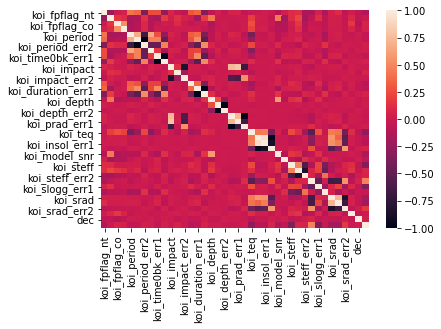

In [30]:
sn.heatmap(corrs)

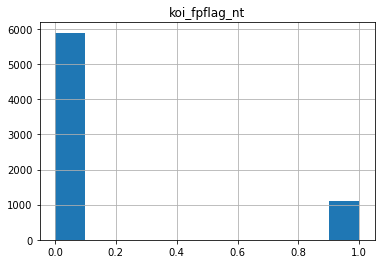

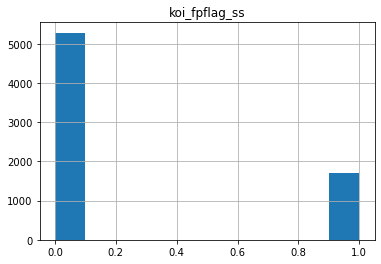

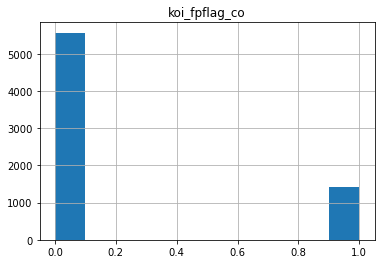

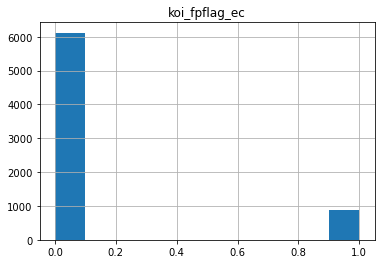

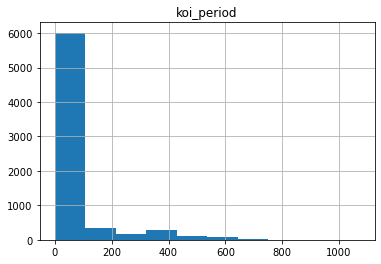

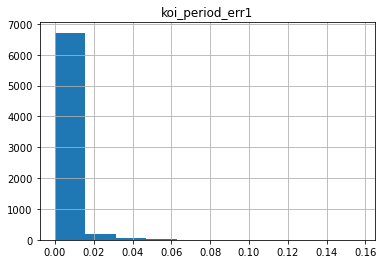

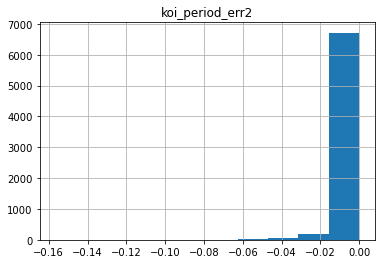

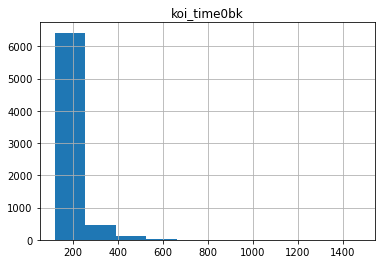

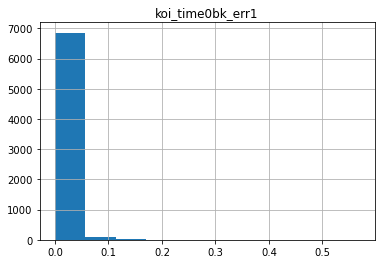

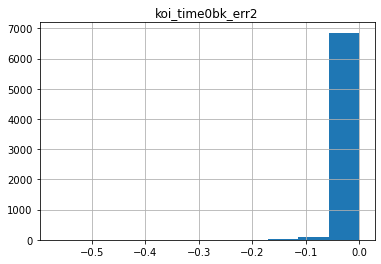

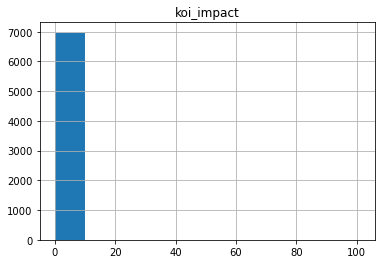

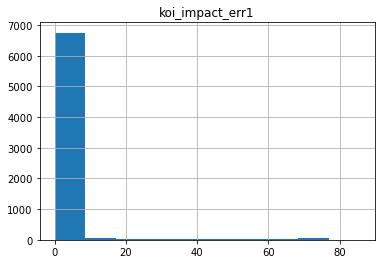

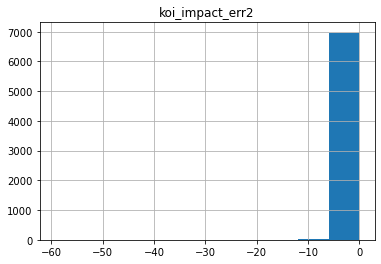

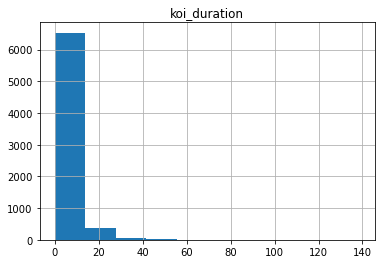

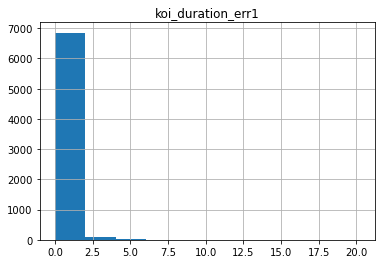

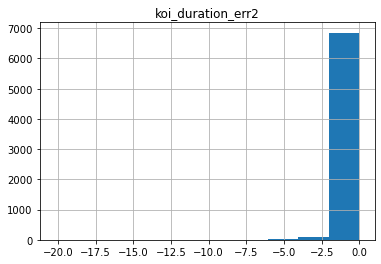

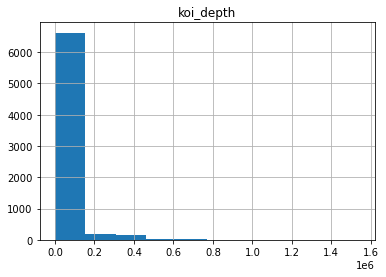

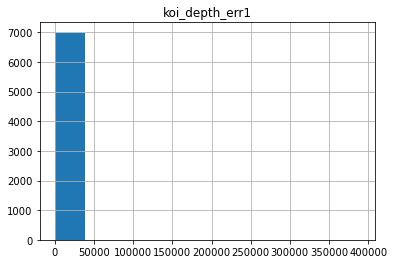

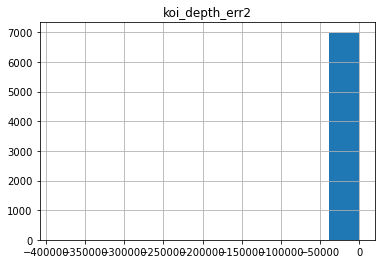

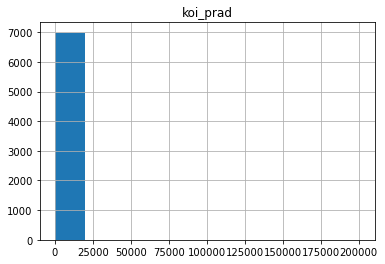

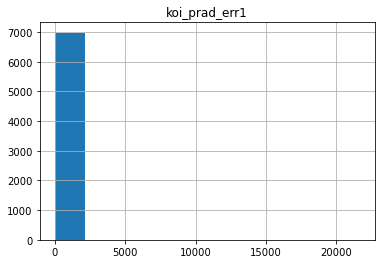

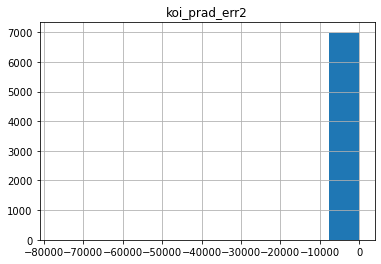

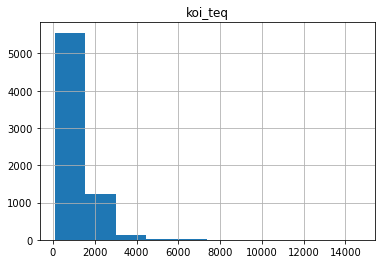

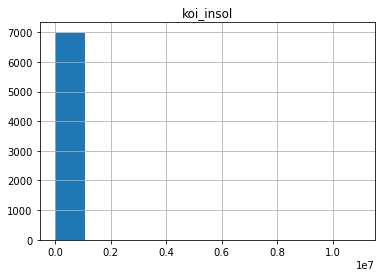

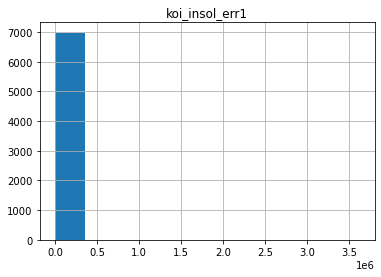

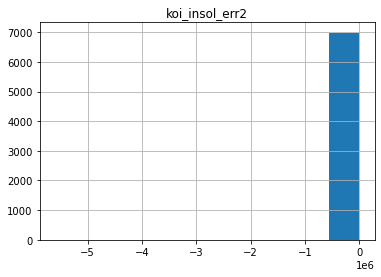

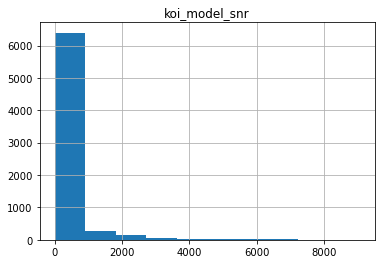

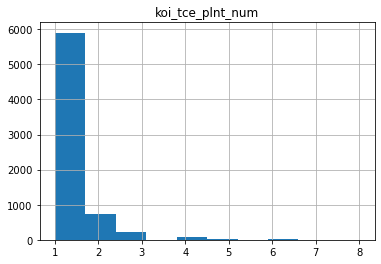

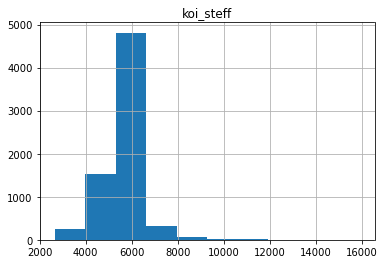

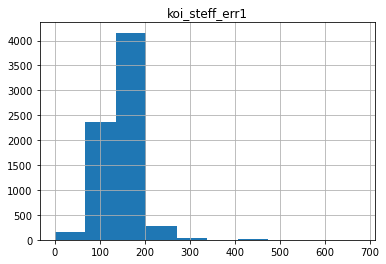

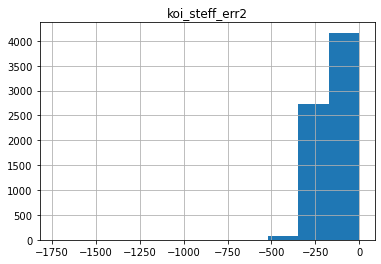

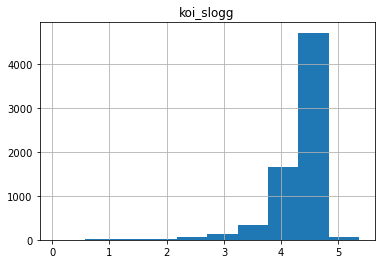

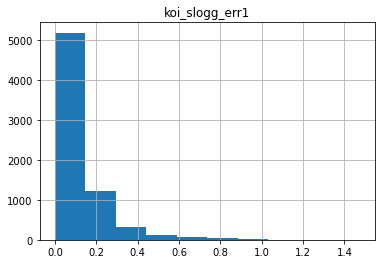

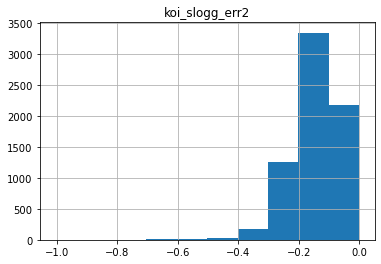

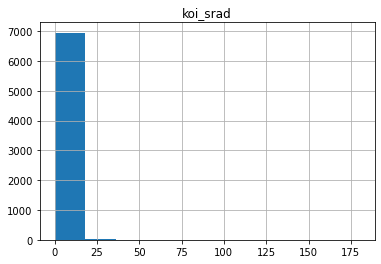

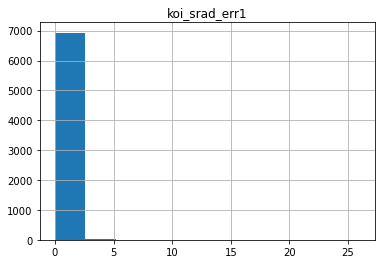

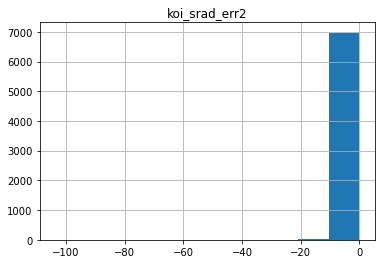

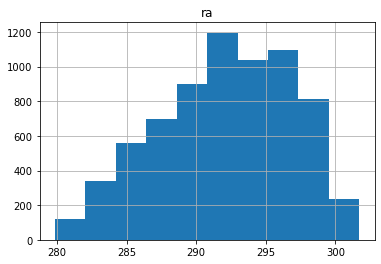

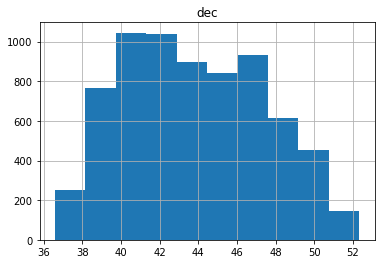

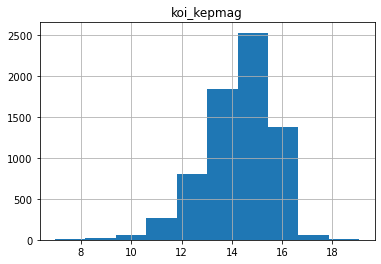

In [42]:
for col in data:
    df[col].hist()
    plt.title(col)
    plt.show()

# Create a Train Test Split

Use `koi_disposition` for the y values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target, test_size=0.2)

In [45]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
5249,0,0,0,0,505.462916,8.292000e-03,-8.292000e-03,458.077550,0.008630,-0.008630,...,-167,4.499,0.095,-0.114,0.833,0.068,-0.084,289.53882,41.892818,15.768
4553,0,0,0,0,16.934810,1.990000e-04,-1.990000e-04,137.250200,0.010300,-0.010300,...,-139,4.589,0.048,-0.028,0.706,0.046,-0.061,285.75146,41.335640,15.549
428,1,0,0,0,0.635070,7.100000e-08,-7.100000e-08,134.020928,0.000087,-0.000087,...,-206,4.434,0.054,-0.216,1.058,0.335,-0.112,296.32028,47.406570,14.539
2964,0,0,0,0,2.509334,4.150000e-05,-4.150000e-05,133.112300,0.013000,-0.013000,...,-261,4.425,0.065,-0.195,1.081,0.329,-0.141,295.37204,38.897739,15.588
4472,1,0,0,0,290.625016,7.059000e-03,-7.059000e-03,349.709800,0.017200,-0.017200,...,-156,3.735,0.628,-0.340,2.409,1.296,-1.286,284.18527,42.563271,11.098


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [46]:
#SCALE 
X_scaler = StandardScaler().fit(X_train)

#scale train/test
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
X_train_scaled

array([[-0.42572536, -0.57046697, -0.50742187, ..., -0.5382628 ,
        -0.53041664,  1.10695543],
       [-0.42572536, -0.57046697, -0.50742187, ..., -1.33506601,
        -0.68501948,  0.94382061],
       [ 2.34893221, -0.57046697, -0.50742187, ...,  0.88845371,
         0.99951044,  0.19146369],
       ...,
       [-0.42572536, -0.57046697, -0.50742187, ...,  0.71868575,
        -0.41222016, -3.37738975],
       [-0.42572536, -0.57046697, -0.50742187, ...,  0.34477084,
        -1.34973777,  1.21124252],
       [-0.42572536, -0.57046697, -0.50742187, ...,  0.1154282 ,
        -0.6801917 ,  0.48048793]])

# Train the Model



In [48]:
#Confirmed = 1, False Positive = 2, Candidate = 0

Logistic Regression Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       338
           1       0.77      0.86      0.81       360
           2       0.98      1.00      0.99       701

    accuracy                           0.89      1399
   macro avg       0.87      0.86      0.86      1399
weighted avg       0.90      0.89      0.89      1399


Confusion Matrix:
[[244  91   3]
 [ 42 310   8]
 [  1   2 698]]

ROC Curve:


C:\Users\DanMona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


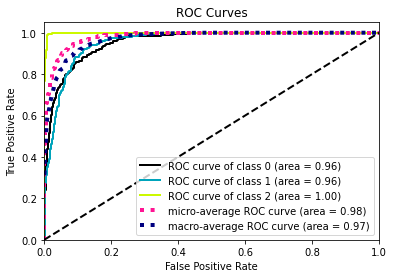

In [49]:
#logistic
lrc = LogisticRegression() #init
lrc.fit(X_train_scaled, y_train) #fit
preds = lrc.predict(X_test_scaled) #predict
proba_preds = lrc.predict_proba(X_test_scaled) #predict

print("Logistic Regression Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

In [ ]:
#Confirmed = 1, False Positive = 2, Candidate = 0

k: 1, Train/Test Score: 1.000/0.823
k: 3, Train/Test Score: 0.908/0.848
k: 5, Train/Test Score: 0.887/0.838
k: 7, Train/Test Score: 0.876/0.854
k: 9, Train/Test Score: 0.871/0.853
k: 11, Train/Test Score: 0.863/0.844
k: 13, Train/Test Score: 0.856/0.848
k: 15, Train/Test Score: 0.859/0.841
k: 17, Train/Test Score: 0.854/0.839
k: 19, Train/Test Score: 0.849/0.844


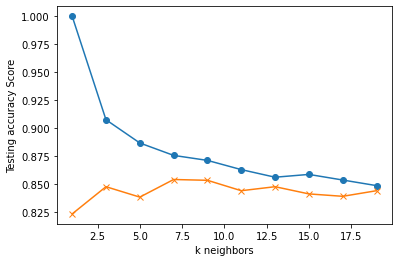

In [50]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
#Confirmed = 1, False Positive = 2, Candidate = 0

KNN Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.63      0.66       338
           1       0.70      0.77      0.73       360
           2       0.98      0.97      0.98       701

    accuracy                           0.84      1399
   macro avg       0.79      0.79      0.79      1399
weighted avg       0.84      0.84      0.84      1399


Confusion Matrix:
[[214 118   6]
 [ 76 277   7]
 [ 16   3 682]]

ROC Curve:


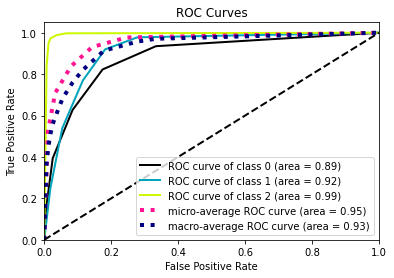

In [52]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
preds = knn.predict(X_test_scaled) #predict
proba_preds = knn.predict_proba(X_test_scaled) #predict

print("KNN Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

In [ ]:
#Confirmed = 1, False Positive = 2, Candidate = 0

SVM Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.74      0.79       338
           1       0.78      0.86      0.82       360
           2       0.98      1.00      0.99       701

    accuracy                           0.90      1399
   macro avg       0.87      0.87      0.87      1399
weighted avg       0.90      0.90      0.90      1399


Confusion Matrix:
[[249  87   2]
 [ 40 310  10]
 [  1   0 700]]

ROC Curve:


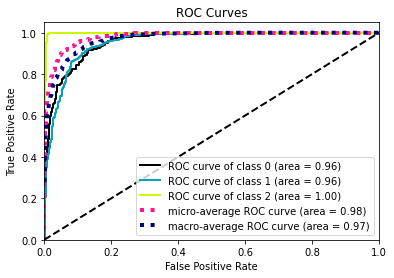

In [53]:
#SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_scaled, y_train)
preds = svm.predict(X_test_scaled) #predict
proba_preds = svm.predict_proba(X_test_scaled) #predict

print("SVM Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

In [ ]:
#Confirmed = 1, False Positive = 2, Candidate = 0

Decision Tree Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       338
           1       0.72      0.73      0.73       360
           2       0.98      0.97      0.98       701

    accuracy                           0.85      1399
   macro avg       0.81      0.81      0.81      1399
weighted avg       0.85      0.85      0.85      1399


Confusion Matrix:
[[242  92   4]
 [ 89 263   8]
 [  9  10 682]]

ROC Curve:


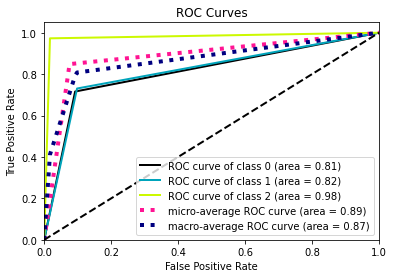

In [54]:
#Decision Tree
dtc = DecisionTreeClassifier() #init
dtc.fit(X_train_scaled, y_train) #fit
preds = dtc.predict(X_test_scaled) #predict
proba_preds = dtc.predict_proba(X_test_scaled) #predict

print("Decision Tree Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

In [ ]:
#Confirmed = 1, False Positive = 2, Candidate = 0

Bagging Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       338
           1       0.80      0.78      0.79       360
           2       0.98      1.00      0.99       701

    accuracy                           0.89      1399
   macro avg       0.86      0.86      0.86      1399
weighted avg       0.89      0.89      0.89      1399


Confusion Matrix:
[[268  68   2]
 [ 70 281   9]
 [  1   2 698]]

ROC Curve:


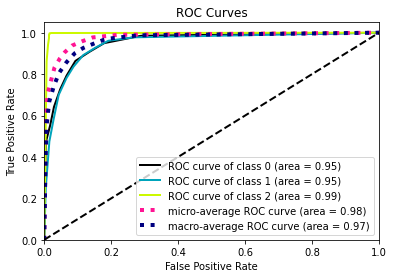

In [55]:
#Bagging Classifier
bagc = BaggingClassifier() #init
bagc.fit(X_train_scaled, y_train) #fit
preds = bagc.predict(X_test_scaled) #predict
proba_preds = bagc.predict_proba(X_test_scaled) #predict

print("Bagging Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

In [ ]:
#Confirmed = 1, False Positive = 2, Candidate = 0

Random Forest Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       338
           1       0.82      0.83      0.82       360
           2       0.97      1.00      0.99       701

    accuracy                           0.90      1399
   macro avg       0.87      0.87      0.87      1399
weighted avg       0.90      0.90      0.90      1399


Confusion Matrix:
[[259  67  12]
 [ 53 299   8]
 [  1   0 700]]

ROC Curve:


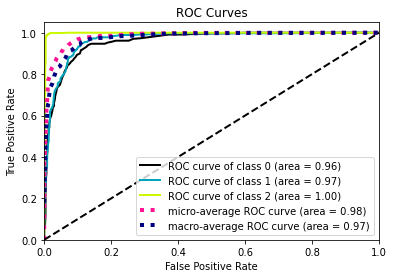

In [56]:
#Random Forest Classifier
rfc = RandomForestClassifier() #init
rfc.fit(X_train_scaled, y_train) #fit
preds = rfc.predict(X_test_scaled) #predict
proba_preds = rfc.predict_proba(X_test_scaled) #predict

print("Random Forest Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

In [ ]:
#Confirmed = 1, False Positive = 2, Candidate = 0

Ada Boost Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.62      0.69       338
           1       0.59      0.83      0.69       360
           2       0.99      0.88      0.93       701

    accuracy                           0.80      1399
   macro avg       0.79      0.77      0.77      1399
weighted avg       0.84      0.80      0.81      1399


Confusion Matrix:
[[208 128   2]
 [ 57 298   5]
 [  1  83 617]]

ROC Curve:


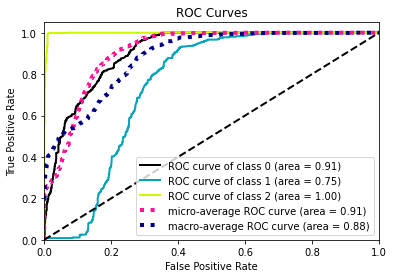

In [57]:
#Ada Boost Classifier
adac = AdaBoostClassifier() #init
adac.fit(X_train_scaled, y_train) #fit
preds = adac.predict(X_test_scaled) #predict
proba_preds = adac.predict_proba(X_test_scaled) #predict

print("Ada Boost Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

In [ ]:
#Confirmed = 1, False Positive = 2, Candidate = 0

Gradient Boosting Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       338
           1       0.80      0.82      0.81       360
           2       0.98      1.00      0.99       701

    accuracy                           0.90      1399
   macro avg       0.87      0.87      0.87      1399
weighted avg       0.90      0.90      0.90      1399


Confusion Matrix:
[[263  73   2]
 [ 54 297   9]
 [  1   0 700]]

ROC Curve:


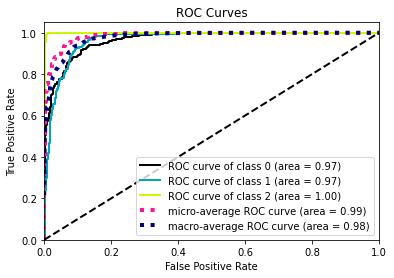

In [58]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier() #init
gbc.fit(X_train_scaled, y_train) #fit
preds = gbc.predict(X_test_scaled) #predict
proba_preds = gbc.predict_proba(X_test_scaled) #predict

print("Gradient Boosting Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

In [ ]:
#Confirmed = 1, False Positive = 2, Candidate = 0

Extreme Gradient Boosting Analysis:
Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       338
           1       0.82      0.85      0.83       360
           2       0.99      1.00      0.99       701

    accuracy                           0.91      1399
   macro avg       0.88      0.88      0.88      1399
weighted avg       0.91      0.91      0.91      1399


Confusion Matrix:
[[269  67   2]
 [ 48 306   6]
 [  1   0 700]]

ROC Curve:


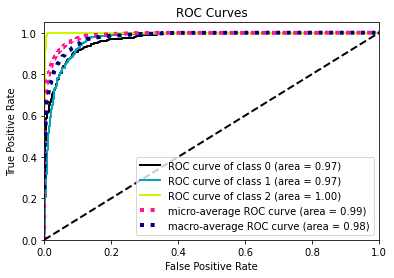

In [60]:
#Gradient Boosting Classifier
xgbc = XGBClassifier() #init
xgbc.fit(X_train_scaled, y_train) #fit
preds = xgbc.predict(X_test_scaled) #predict
proba_preds = xgbc.predict_proba(X_test_scaled) #predict

print("Extreme Gradient Boosting Analysis:")
print("Classification Report:")
print()
print(classification_report(y_test, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, preds)) #evaluate

print()
print("ROC Curve:")
plot_roc(y_test, proba_preds) 
plt.show()

In [ ]:
#Confirmed = 1, False Positive = 2, Candidate = 0

In [61]:
X_scaler_prod = StandardScaler().fit(data)
X_scaled_prod = X_scaler_prod.transform(data)

Bagging Analysis PROD:
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1687
           1       0.99      0.98      0.99      1800
           2       1.00      1.00      1.00      3504

    accuracy                           0.99      6991
   macro avg       0.99      0.99      0.99      6991
weighted avg       0.99      0.99      0.99      6991


Confusion Matrix:
[[1667   14    6]
 [  29 1767    4]
 [   1    0 3503]]

ROC Curve:


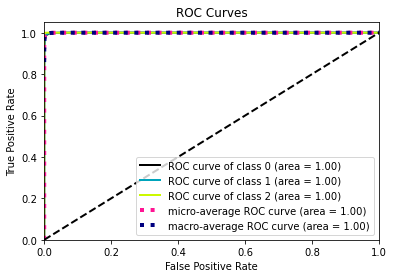

In [62]:
#This is the Metric Analysis on ALL training data (all seen)
bagc = BaggingClassifier() #init
bagc.fit(X_scaled_prod, target) #fit
preds = bagc.predict(X_scaled_prod) #predict
proba_preds = bagc.predict_proba(X_scaled_prod) #predict

print("Bagging Analysis PROD:")
print("Classification Report:")
print()
print(classification_report(target, preds)) #evaluate
print()
print("Confusion Matrix:")
print(confusion_matrix(target, preds)) #evaluate

print()
print("ROC Curve:")
plot_roc(target, proba_preds) 
plt.show()

In [ ]:
#Confirmed = 1, False Positive = 2, Candidate = 0

In [75]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(kernel='linear')

In [76]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

# Save the Model

## Bagging classifier has the best scores and lowest negative rates. Bagging Classifier is the chosen model.

In [65]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
filename = 'Daniel.sav'
pickle.dump(bagc, open(filename, 'wb'))

In [66]:
filename = 'finalized_scaler.sav'
pickle.dump(X_scaler_prod, open(filename, 'wb'))

In [70]:
loaded_scaler = pickle.load(open('finalized_scaler.sav', 'rb'))
loaded_model = pickle.load(open('Daniel.sav', 'rb'))

In [77]:
newData = [3, 100, 83, 23, 0, 25.3, 0.322, 57,
           5, 52, 73, 78, 5, 37.8, 0.241, 67,
           7, 87, 92, 10, 1, 11.2, 0.159, 99,
           9, 41, 5, 96, 3, 56.5, 0.857, 30,
           1, 16, 64, 20, 0, 21.0, 0.517, 17]

In [78]:
newData_scaled = loaded_scaler.transform([newData])
loaded_model.predict_proba(newData_scaled)

array([[0. , 0.3, 0.7]])